In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
#set path to read csv
emission_data_path = "carbon_emission_data.csv"
income_data_path ="median_income_2018.csv"
energy_source_path = "energy_by_source.csv"

#read csv
state_emissions_2018 = pd.read_csv(emission_data_path)
state_income_2018 = pd.read_csv(income_data_path)
energy_source_data = pd.read_csv(energy_source_path)

In [3]:
#for the first couple of dataframes, the state names had to be replaced using a state abbreviation dictionary in order
#to merge the datasets
#commas had to be removed from the median income data and converted to integers so that the data could be read for plotting

In [4]:
#replace abbreviated state names with dictionary
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

state_emissions_2018 = state_emissions_2018.replace({"State": abbrev_us_state})

In [5]:
#merge dataframes
merge_df = pd.merge(state_emissions_2018, state_income_2018, how="outer", on="State")
merge_df = merge_df.drop(columns=["Federal offshore production is not included in the Production Shares."])
merge_df = merge_df.drop(index=51)

#remove commas from median income data
merge_df["Median income"] = merge_df["Median income"].str.replace(",","")
merge_df["Median income"] = merge_df["Median income"].astype(int)
merge_df

,State,"Production, U.S. Share","Production, Rank","Consumption per Capita, Million Btu","Consumption per Capita, Rank","Expenditures per Capita, Dollars","Expenditures per Capita, Rank",Median income,Standard error
0,Wyoming,8.1,3.0,967.0,1.0,8651.0,1.0,62539,"3,892"
1,North Dakota,4.4,6.0,872.0,3.0,8097.0,2.0,66505,"3,095"
2,Alaska,1.5,13.0,830.0,4.0,8060.0,3.0,68734,"3,390"
3,Louisiana,3.7,8.0,945.0,2.0,7537.0,4.0,49973,"1,754"
4,Texas,21.3,1.0,498.0,6.0,5345.0,5.0,59785,"1,372"
5,Iowa,0.9,22.0,513.0,5.0,4956.0,6.0,68718,"2,910"
6,South Dakota,0.3,40.0,452.0,9.0,4888.0,7.0,59463,"2,642"
7,West Virginia,5.0,5.0,462.0,8.0,4860.0,8.0,50573,"1,337"
8,Mississippi,0.3,37.0,400.0,13.0,4829.0,9.0,42781,"2,304"
9,Montana,1.0,18.0,410.0,12.0,4787.0,10.0,57679,"2,876"


In [6]:
#create variables for different value sets 
state_name = merge_df["State"].unique()
us_co2_production = merge_df["Production, U.S. Share"].astype(int)
median_income = merge_df["Median income"].astype(int)
co2_per_capita = merge_df["Consumption per Capita, Million Btu"].tolist()

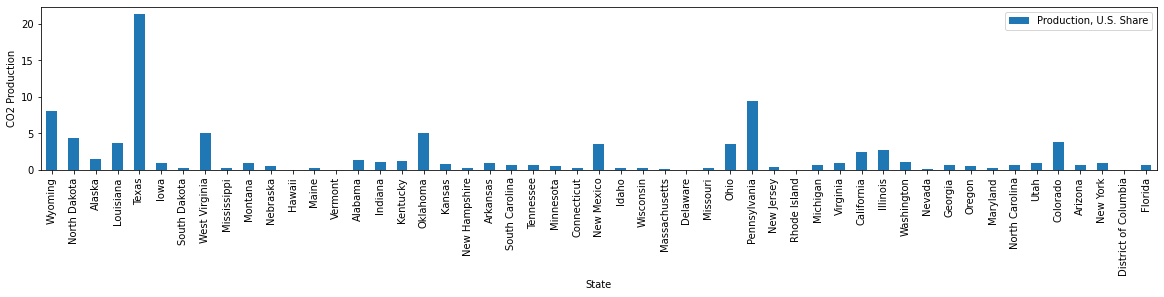

In [7]:
#create dataframe for plotting
state_emissions_df = merge_df[["State", "Production, U.S. Share"]]
state_emissions_df = state_emissions_df.set_index("State")

#plot state vs. emissions data
state_emissions_df.plot(kind='bar', figsize=(20,3))
plt.ylabel("CO2 Production")

plt.show()

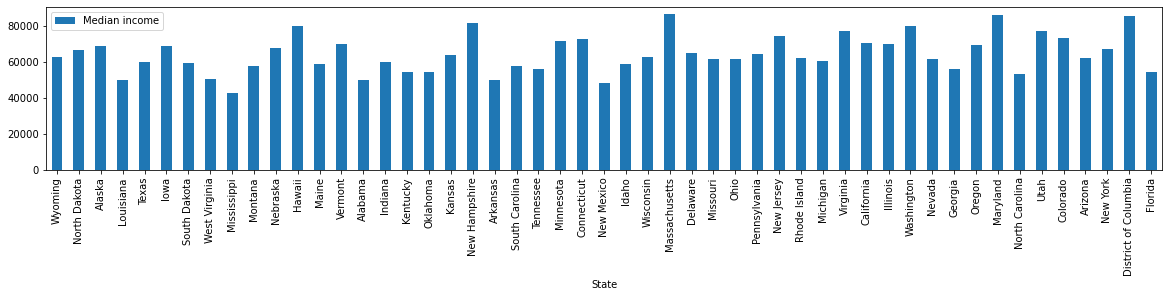

In [8]:
#create dataframe for plotting
state_median_df = merge_df[["State", "Median income"]]
state_median_df = state_median_df.set_index("State")

#plot state vs. median income data
state_median_df.plot(kind='bar', figsize=(20,3))
plt.show()

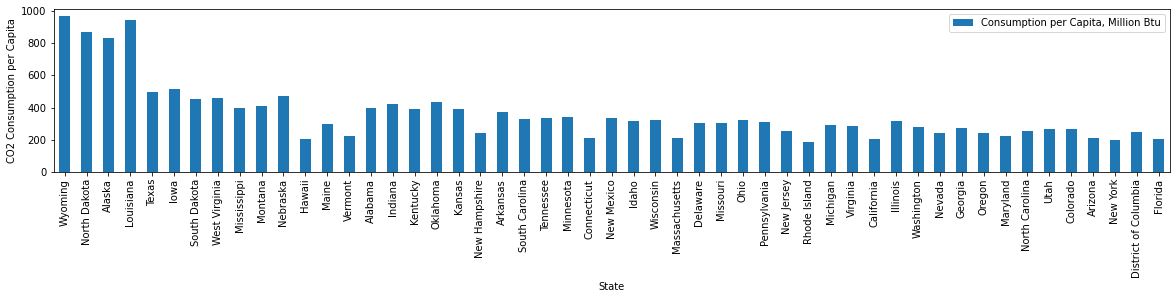

In [9]:
#create dataframe for plotting
state_co2_per_capita = merge_df[["State", "Consumption per Capita, Million Btu"]]
state_co2_per_capita = state_co2_per_capita.set_index("State")

#plot 
state_co2_per_capita.plot(kind='bar', figsize=(20,3))
plt.ylabel("CO2 Consumption per Capita")
plt.show()

In [10]:
emissions_vs_income = merge_df[["State", "Median income","Production, U.S. Share"]]

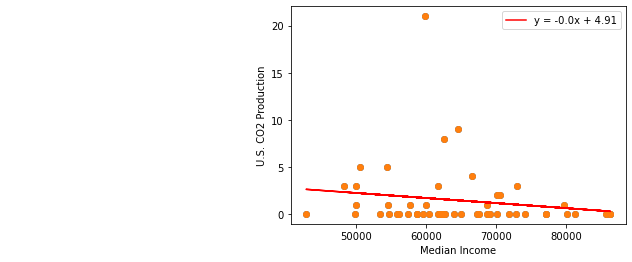

In [17]:
x_values = median_income
y_values = us_co2_production

plt.scatter(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", label=line_eq)
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.legend(loc="best")

plt.xlabel("Median Income")
plt.ylabel("U.S. CO2 Production")

plt.show()

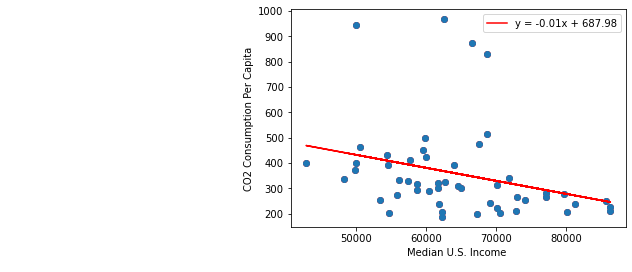

In [15]:
x_values = median_income
y_values = co2_per_capita

plt.scatter(median_income, co2_per_capita, color="red")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-", label=line_eq)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.legend(loc="best")

plt.xlabel("Median U.S. Income ")
plt.ylabel("CO2 Consumption Per Capita")

plt.show()

In [ ]:
energy_source_data

In [12]:
energy_source_data.columns = ["Year", "Coal", "Natural Gas", "Crude Oil",
                  "Natural Gas Plant Liquids", "Nuclear",
                  "Renewables"]
energy_source_data

,Year,Coal,Natural Gas,Crude Oil,Natural Gas Plant Liquids,Nuclear,Renewables
0,1950,14.0601,6.2330,11.4467,0.8250,0.0000,2.9777
1,1951,14.4193,7.4157,13.0367,0.9226,0.0000,2.9585
2,1952,12.7343,7.9636,13.2810,1.0000,0.0000,2.9402
3,1953,12.2777,8.3388,13.6711,1.0643,0.0000,2.8315
4,1954,10.5424,8.6818,13.4269,1.1159,0.0000,2.7541
...,...,...,...,...,...,...,...
70,2015,17.9461,28.0669,19.6959,4.4760,8.3369,9.7288
71,2016,14.6671,27.5760,18.5117,4.6648,8.4268,10.4229
72,2017,15.6254,28.2893,19.5350,4.9871,8.4190,11.1959
73,2018,15.3634,31.6899,22.8897,5.7270,8.4381,11.5084


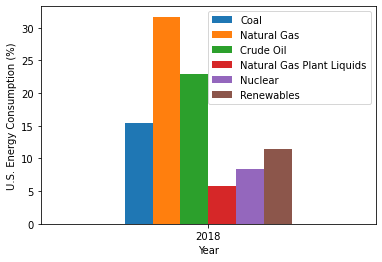

In [13]:
#create dataframe f0r 2018 energy source data 
energy_source_data = energy_source_data.loc[energy_source_data["Year"] == 2018]
energy_source_data = energy_source_data.drop_duplicates(subset=None)
energy_source_data = energy_source_data.set_index("Year")

#creat bar graph 
energy_source_data.plot(kind='bar')
plt.ylabel("U.S. Energy Consumption (%)")
plt.xticks(rotation="horizontal")

plt.show()